In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image


from pathlib import Path

if not Path("images_run_2").exists():
    Path("images_run_2").mkdir(parents=True)
warnings.filterwarnings('ignore')

In [23]:
exp_full = pd.read_csv('../experiments/Altruism_RMAI experiment 3-table.csv', skiprows=[0, 1, 2, 3, 4, 5])
step_col = exp_full.pop("[step]")
exp_full.insert(1, "step", step_col)
exp_full = exp_full.rename(columns={"[run number]": "run-number"}).sort_values(by=['run-number', 'step'])


#### Check summary statistics

In [24]:
COLS_TO_OMIT = ['run-number', 'step', 'count altruism-agents', 'count greedy-agents']

summary = exp_full.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
run-number,1361373.0,6740.584403,3892.056324,1.00,3370.00,6740.0,10110.0,13500.0
step,1361373.0,49.986521,29.157782,0.00,25.00,50.0,75.0,100.0
occupation-var,1361373.0,0.499379,0.257921,0.10,0.30,0.5,0.7,0.9
initial-patch-harshness,1361373.0,27.478953,14.360629,5.00,15.00,25.0,40.0,50.0
prob-gain-resource,1361373.0,0.600170,0.282812,0.20,0.40,0.6,0.8,1.0
stride-length,1361373.0,0.193338,0.167470,0.01,0.05,0.2,0.3,0.5
agent-move-cost,1361373.0,10.000000,0.000000,10.00,10.00,10.0,10.0,10.0
energy-gain,1361373.0,50.000000,0.000000,50.00,50.00,50.0,50.0,50.0
altruism-resource-threshold,1361373.0,20.000000,0.000000,20.00,20.00,20.0,20.0,20.0
reproduction-var,1361373.0,0.500000,0.000000,0.50,0.50,0.5,0.5,0.5


#### Plot 3 x 5 random experiments (each plot contains runs with the same variables)

In [25]:
def plot_random_experiment(exp_full: pd.DataFrame, n=3):
    variables = [col for col in exp_full.columns if col not in COLS_TO_OMIT]
    unique_combinations = exp_full.drop_duplicates(subset=variables)[variables]
    selected_combinations = unique_combinations.sample(3)
    
    for index, row in selected_combinations.iterrows():
        filtered_exp_full = exp_full[(exp_full[variables] == row).all(axis=1)]
        run_numbers = filtered_exp_full['run-number'].unique().tolist()
        selected_combinations_dict = selected_combinations.to_dict()
        plt.figure(figsize=(10, 6))
        for run_number in run_numbers:
            filtered_exp_run = filtered_exp_full[(filtered_exp_full['run-number'] == run_number)]
            sns.lineplot(data=filtered_exp_run, x='step', y='count altruism-agents', label='Altruists', color='blue')
            sns.lineplot(data=filtered_exp_run, x='step', y='count greedy-agents', label='Greedy', color='red' )
            plt.fill_between(filtered_exp_run['step'], filtered_exp_run['count altruism-agents'], alpha=0.1, color='blue')
            plt.fill_between(filtered_exp_run['step'], filtered_exp_run['count greedy-agents'], alpha=0.1, color='red')
    
        plt.title('Run numbers: ' + str(run_numbers)) 
        plt.figtext(1, 0.5, row)
        plt.ylabel('Count')
        plt.xlabel('Step')
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), title='Agent Type')
        plt.tight_layout()

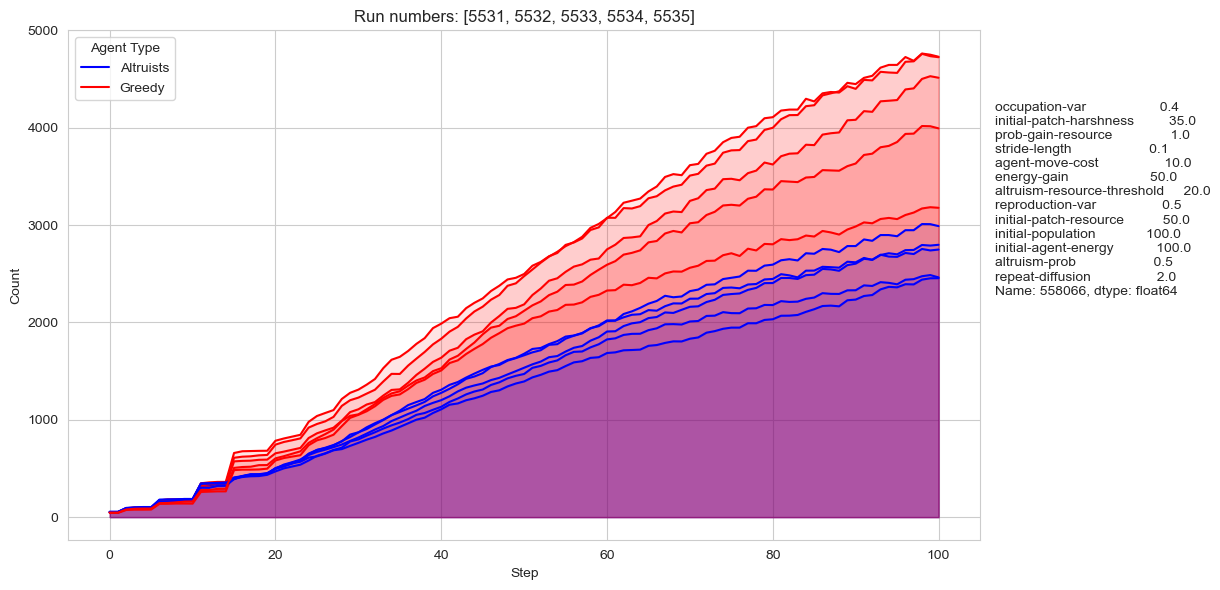

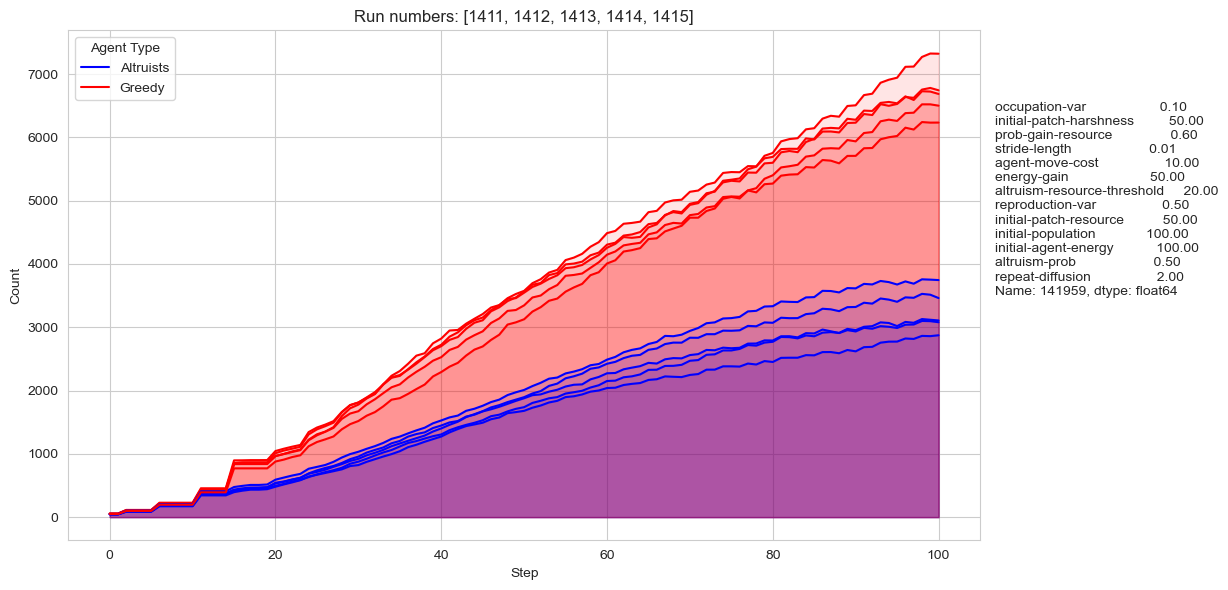

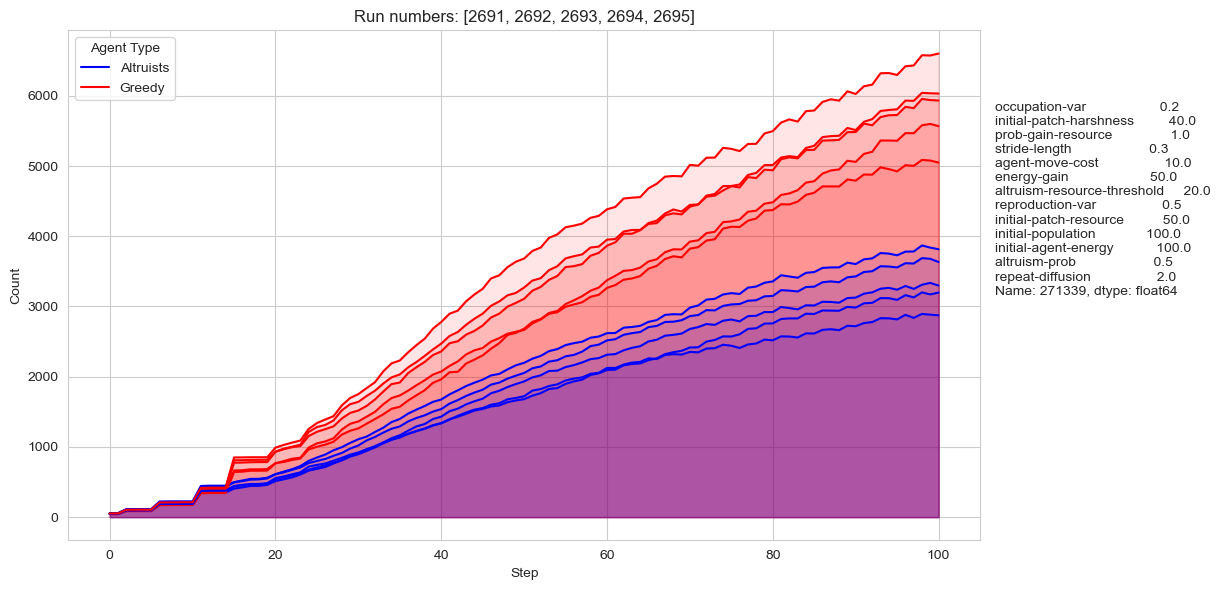

In [26]:
plot_random_experiment(exp_full)

#### Filter down to end states

In [27]:
exp = exp_full[exp_full["step"] == exp_full.groupby(['run-number'])['step'].transform('max')]

#### Find runs that finished early

In [28]:
exp

,run-number,step,occupation-var,initial-patch-harshness,prob-gain-resource,stride-length,agent-move-cost,energy-gain,altruism-resource-threshold,reproduction-var,initial-patch-resource,initial-population,initial-agent-energy,altruism-prob,repeat-diffusion,count altruism-agents,count greedy-agents
997,1,100,0.1,5,0.2,0.01,10,50,20,0.5,50,100,100,0.5,2,2608,7666
992,2,100,0.1,5,0.2,0.01,10,50,20,0.5,50,100,100,0.5,2,2814,6675
983,3,100,0.1,5,0.2,0.01,10,50,20,0.5,50,100,100,0.5,2,3129,6618
999,4,100,0.1,5,0.2,0.01,10,50,20,0.5,50,100,100,0.5,2,3544,6210
1008,5,100,0.1,5,0.2,0.01,10,50,20,0.5,50,100,100,0.5,2,3296,6409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361332,13496,100,0.9,50,1.0,0.50,10,50,20,0.5,50,100,100,0.5,2,579,1815
1361353,13497,100,0.9,50,1.0,0.50,10,50,20,0.5,50,100,100,0.5,2,1117,1555
1361347,13498,100,0.9,50,1.0,0.50,10,50,20,0.5,50,100,100,0.5,2,199,661
1361364,13499,100,0.9,50,1.0,0.50,10,50,20,0.5,50,100,100,0.5,2,145,133


In [29]:
exp_early_finish = exp[exp["step"] < 100]

Check the total count of the agents in the runs that finished early, looks like Behaviour Space does not persist the step where the number of agents hits zero, but ends on the step just before.

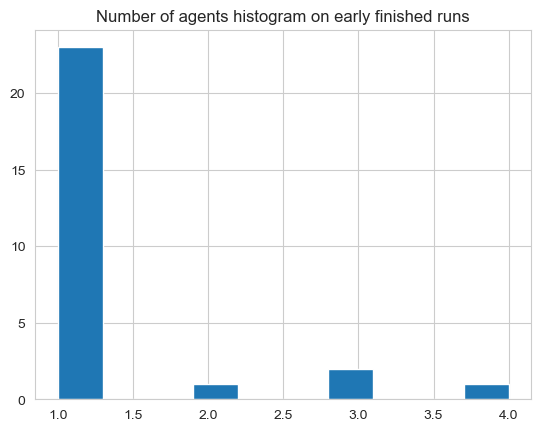

In [30]:

exp_early_finish[['count greedy-agents', 'count altruism-agents']].sum(axis=1).hist()
plt.title('Number of agents histogram on early finished runs')
plt.show()

#### We filter out the early finishers

In [31]:
exp = exp[exp['step'] == 100].drop(columns=['step'])

In [32]:
exp_full = exp_full[exp_full['run-number'].isin(exp['run-number'])]

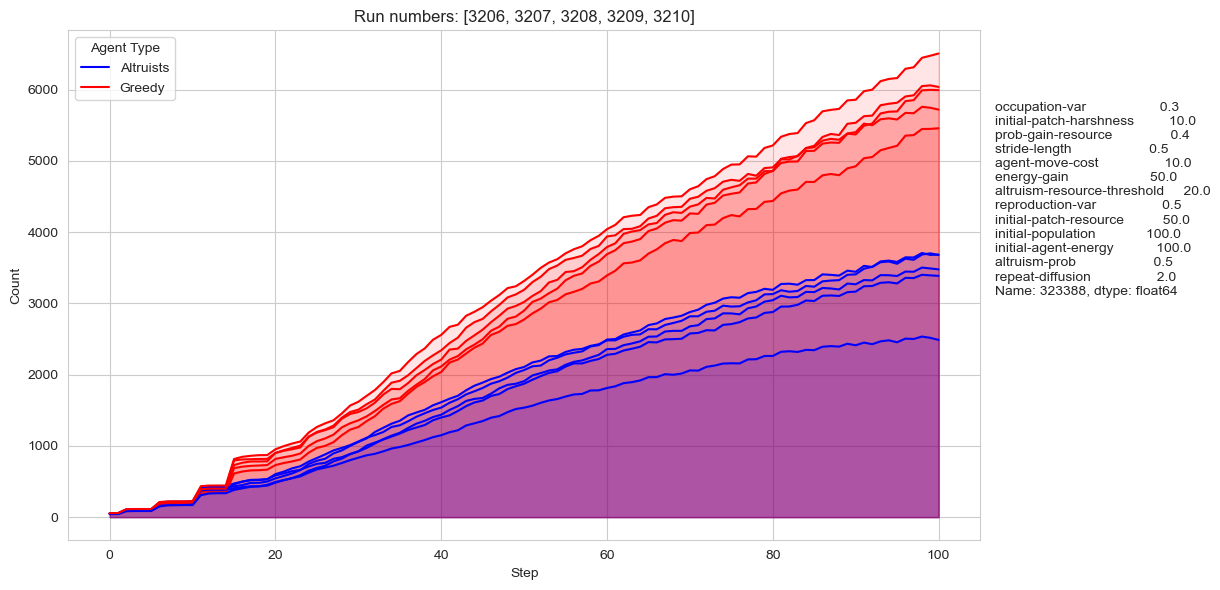

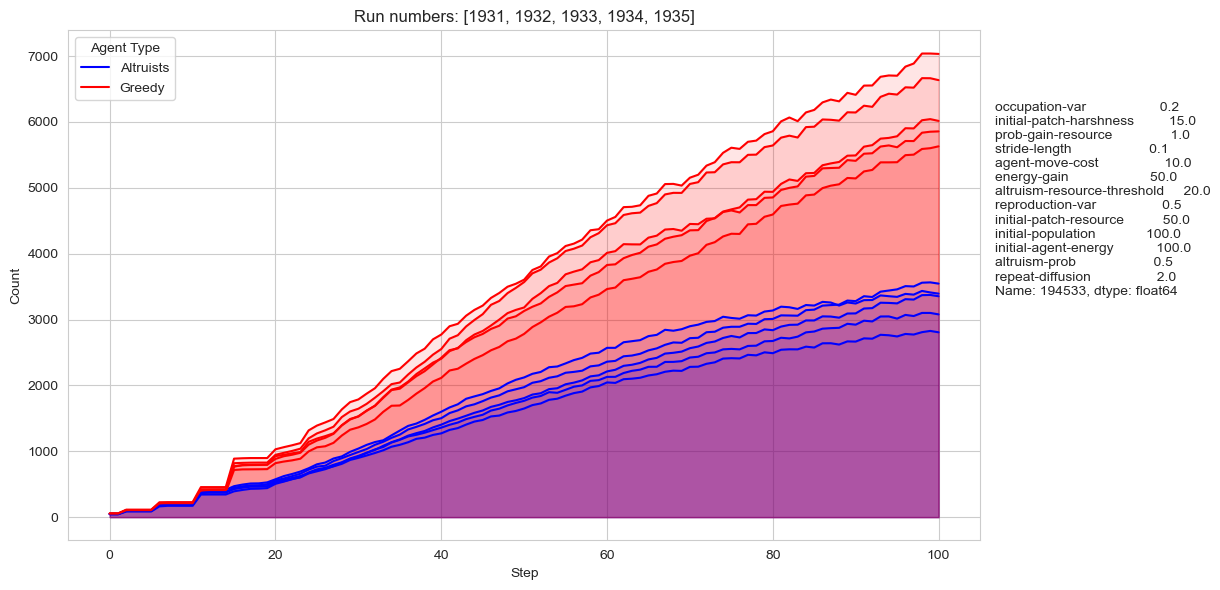

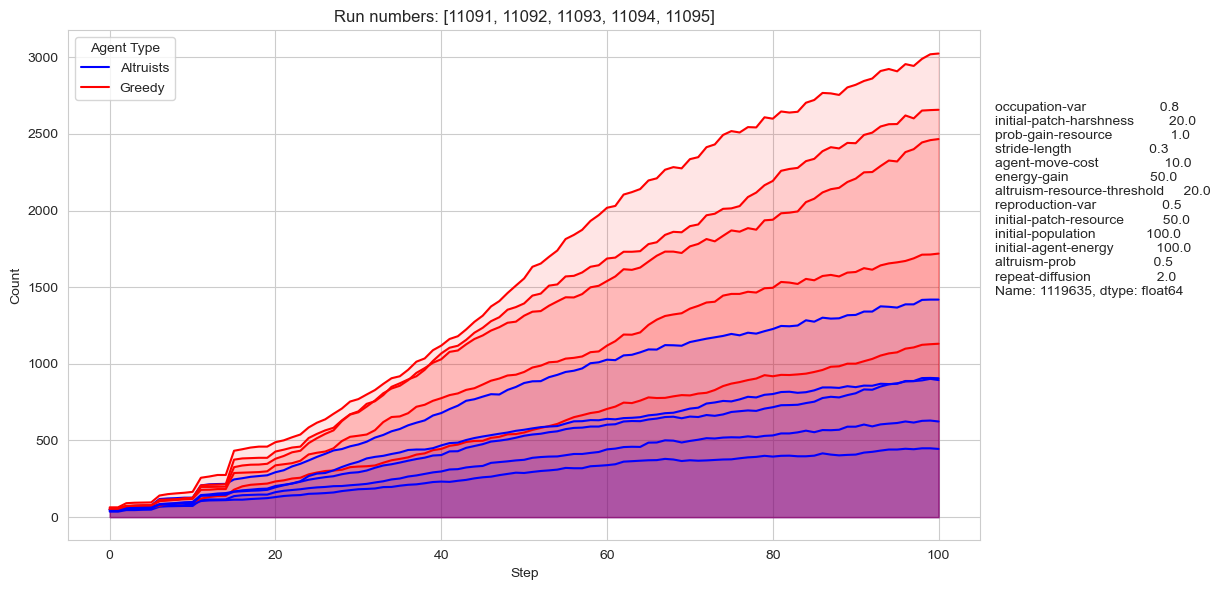

In [33]:
plot_random_experiment(exp_full)

### We look at the distributions of the varying inputs in different cases

In [34]:
varying_inputs = [i for i in summary.index if summary.loc[i]['min'] != summary.loc[i]['max'] and i not in COLS_TO_OMIT]
varying_inputs

['occupation-var',
 'initial-patch-harshness',
 'prob-gain-resource',
 'stride-length']

In [35]:
small_vars = ['occupation-var',
 'prob-gain-resource',
 'stride-length',
]
large_vars = [col for col in varying_inputs if col not in small_vars]
  
def strip_plots(end_states_df, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    melted_small = end_states_df.melt(value_vars=small_vars, var_name='Variable', value_name='Value')
    melted_large = end_states_df.melt(value_vars=large_vars, var_name='Variable', value_name='Value')

    sns.stripplot(x='Variable', y='Value', data=melted_small, ax=axes[0], dodge=True, alpha=0.01, size=10)
    axes[0].set_title('Small Ranges')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Value')
    
    sns.stripplot(x='Variable', y='Value', data=melted_large, ax=axes[1],  dodge=True, alpha=0.01, size=10)
    axes[1].set_title('Large Ranges')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.figtext(0.5, 0, title)
    plt.show()
    

def plot_histograms_grid(data, title):
    # Determine grid size
    n_vars = len(varying_inputs)
    n_cols = 3  # You can adjust the number of columns based on your preference
    n_rows = np.ceil(n_vars / n_cols).astype(int)

    # Create figure and axes
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4))
    fig.suptitle(title)

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    # Plot each variable
    for i, var in enumerate(varying_inputs):
        sns.histplot(data[var], ax=axes[i], kde=False, bins=20)
        axes[i].set_title(var)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

    # Hide unused subplots if any
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
    plt.show()
    

#### No altruists left

Number of runs with no Altruists: 29


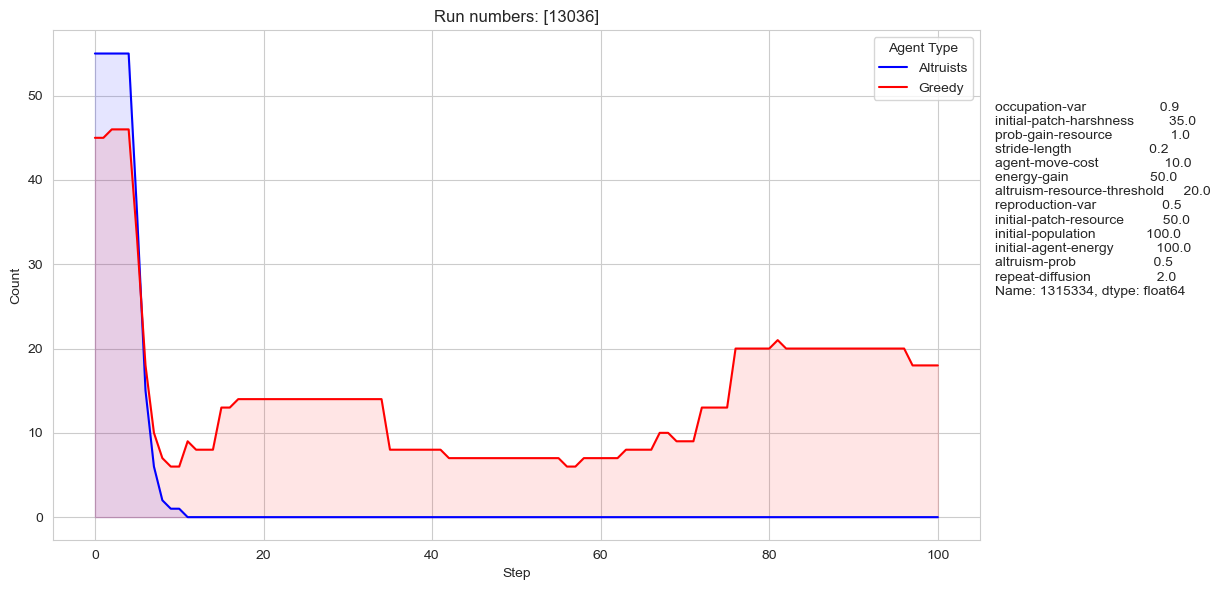

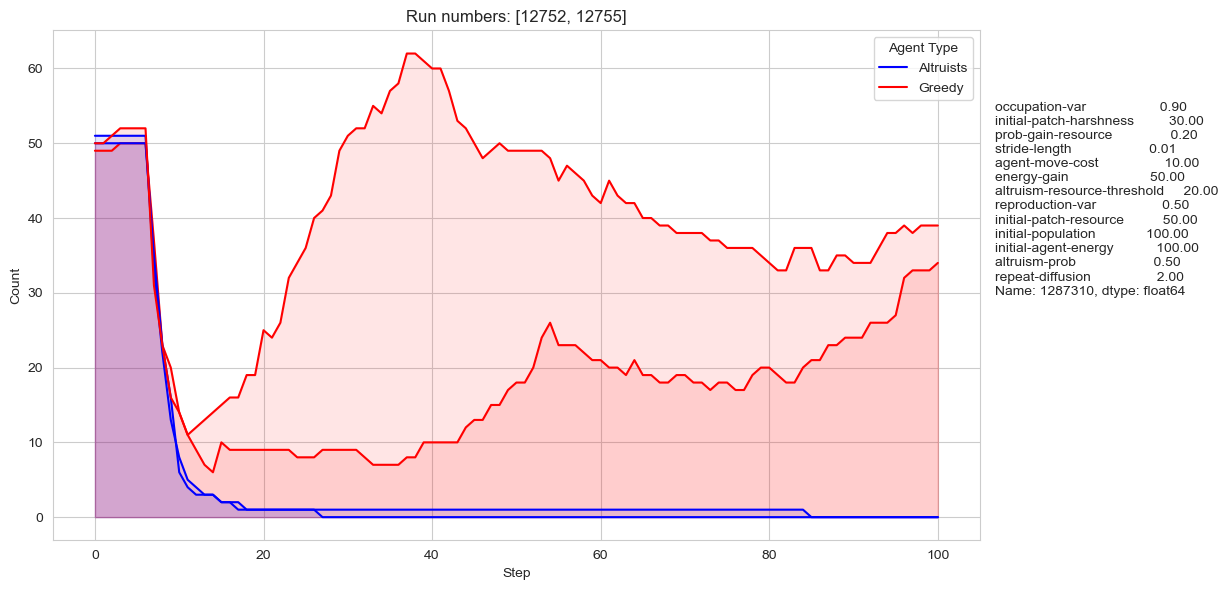

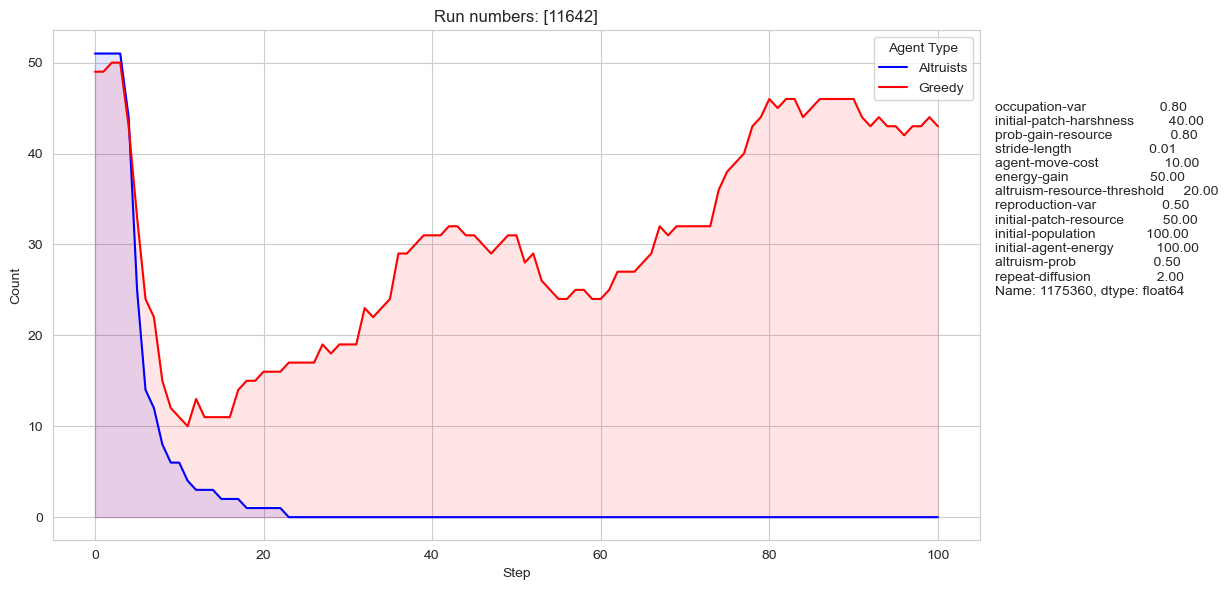

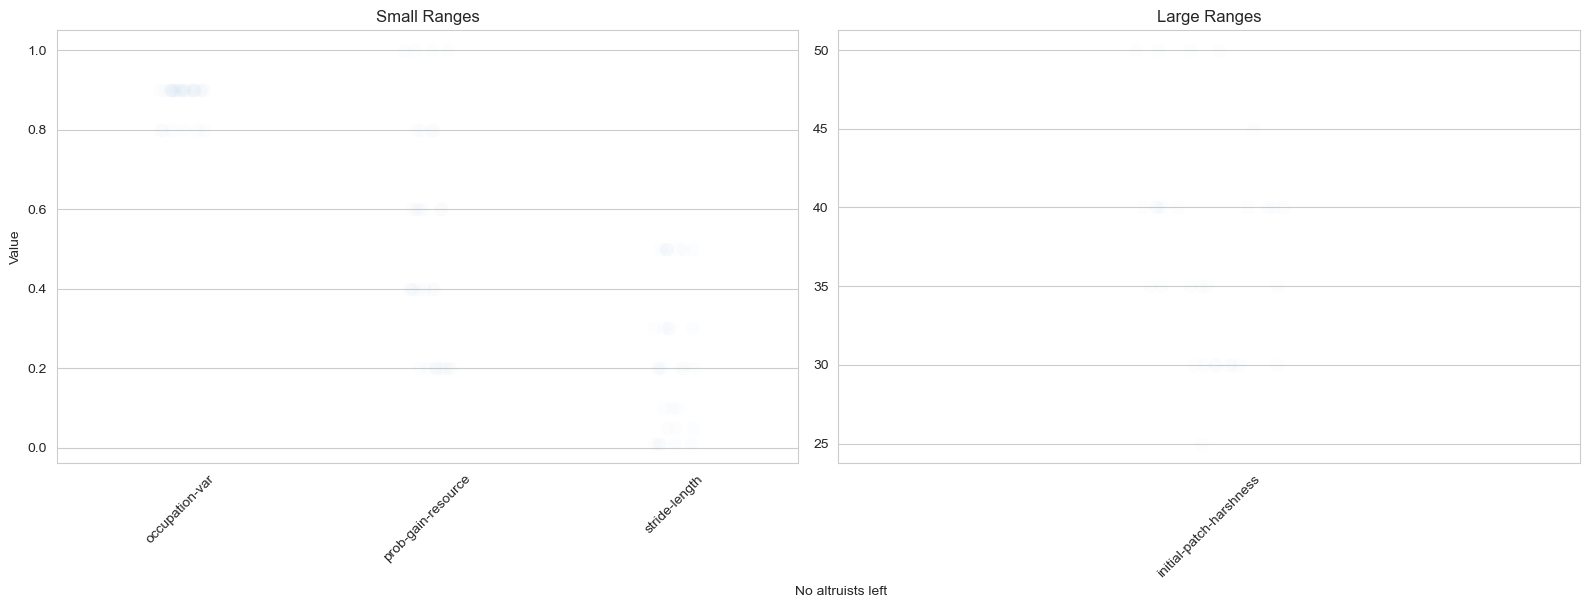

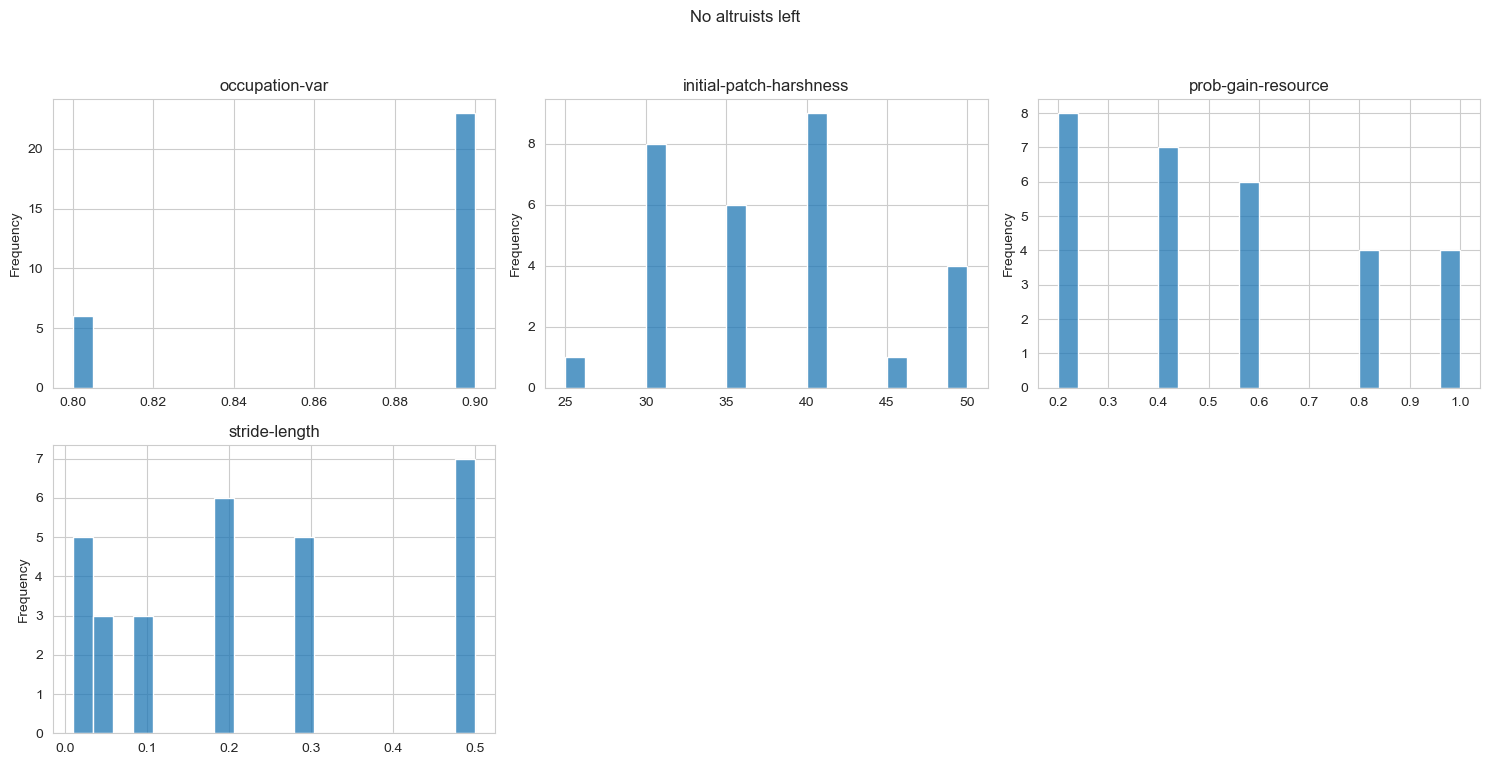

In [36]:
exp_no_altruists = exp[exp['count altruism-agents'] == 0]
exp_full_no_alruists = exp_full[exp_full['run-number'].isin(exp_no_altruists['run-number'])]
print('Number of runs with no Altruists:', len(exp_no_altruists))
plot_random_experiment(exp_full_no_alruists)
strip_plots(exp_no_altruists, 'No altruists left')
plot_histograms_grid(exp_no_altruists, 'No altruists left')

#### No greedy agents left

Number of runs with no greedy agents 15


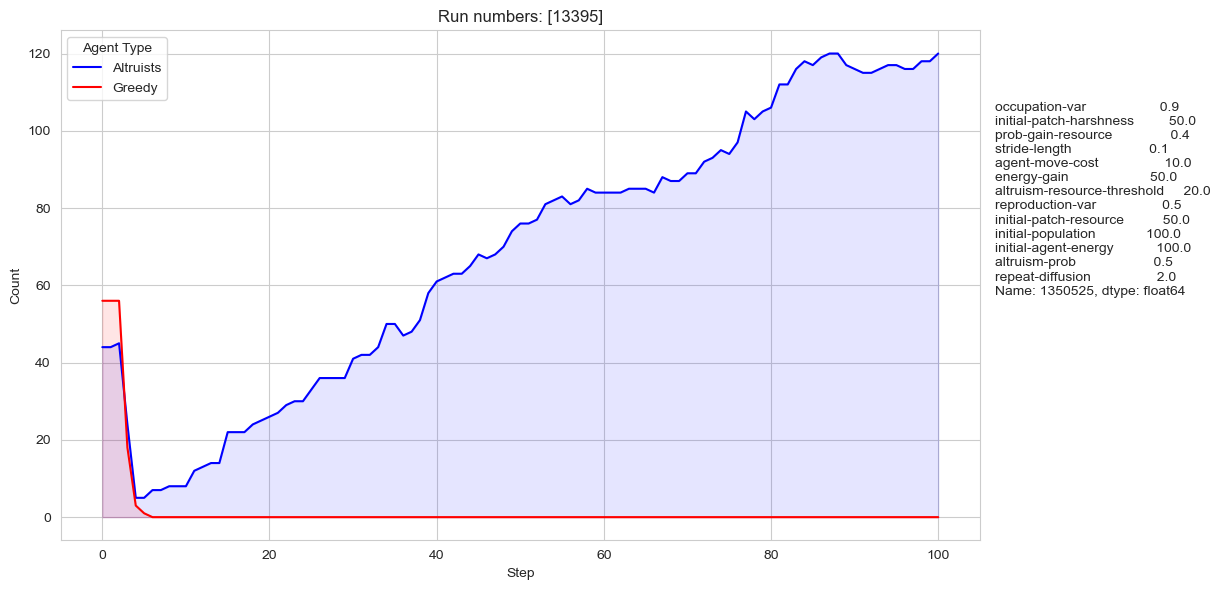

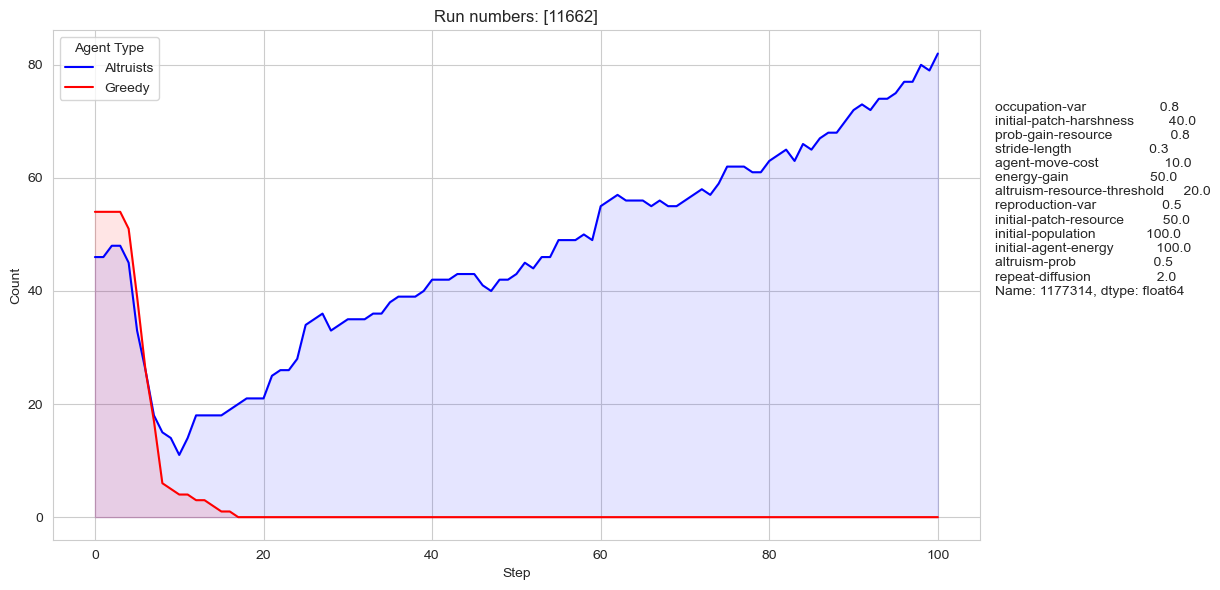

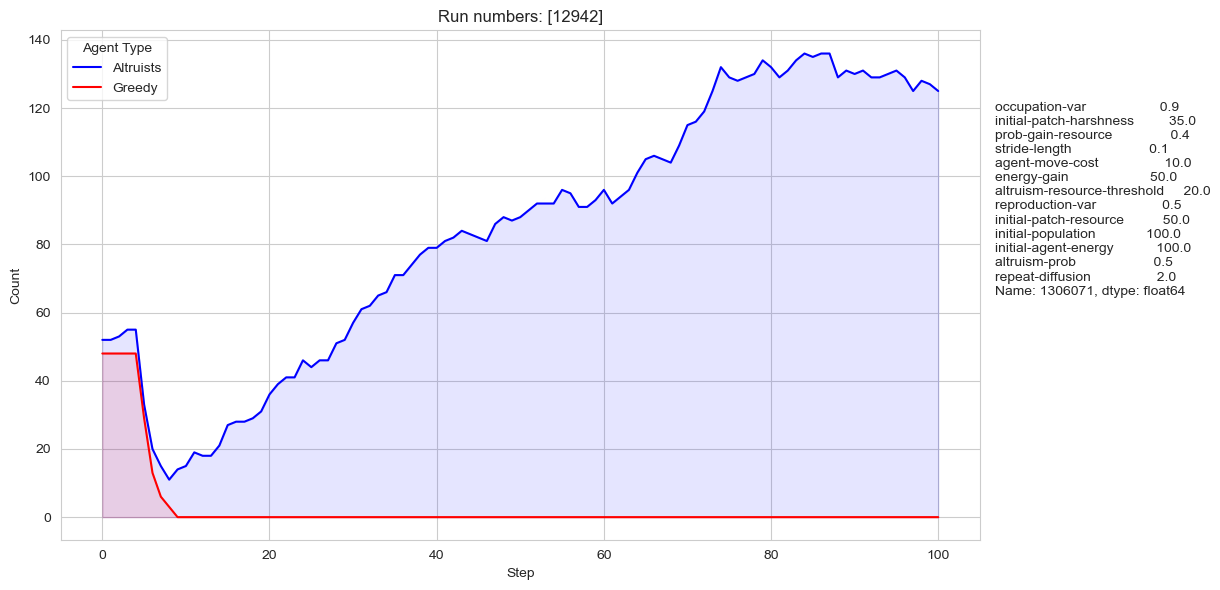

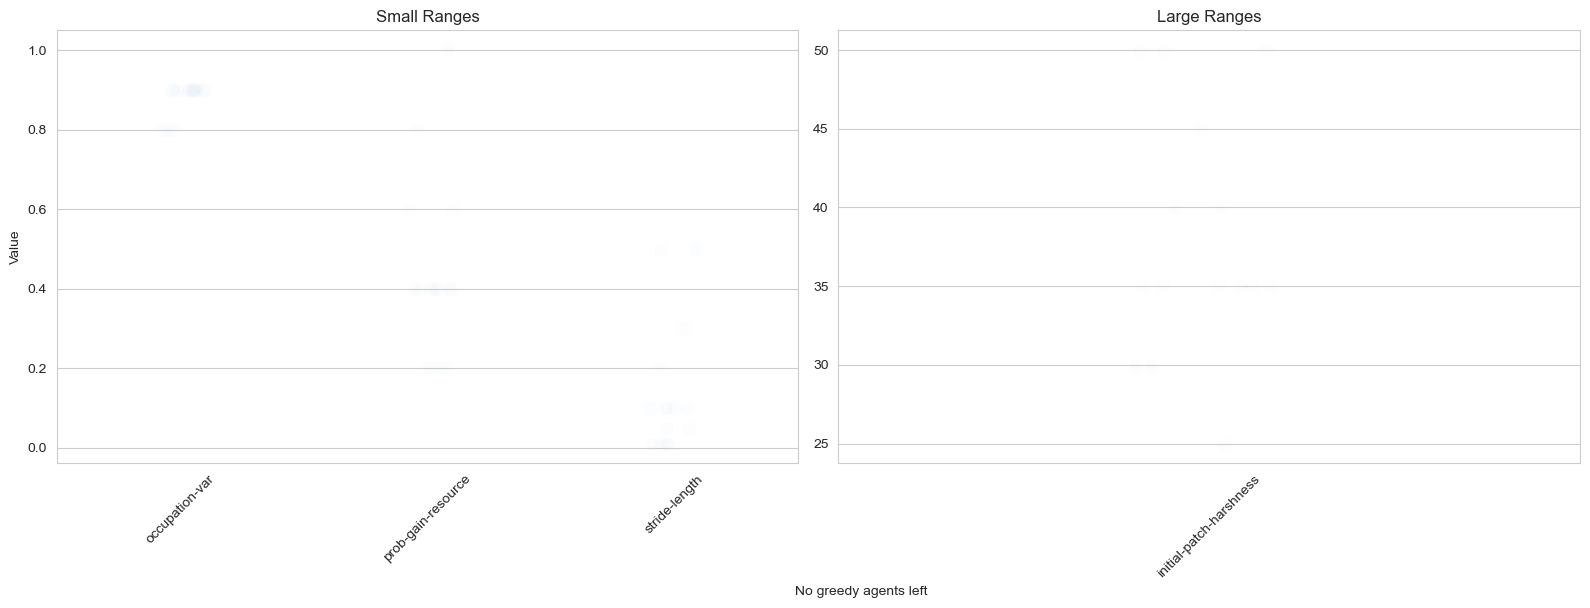

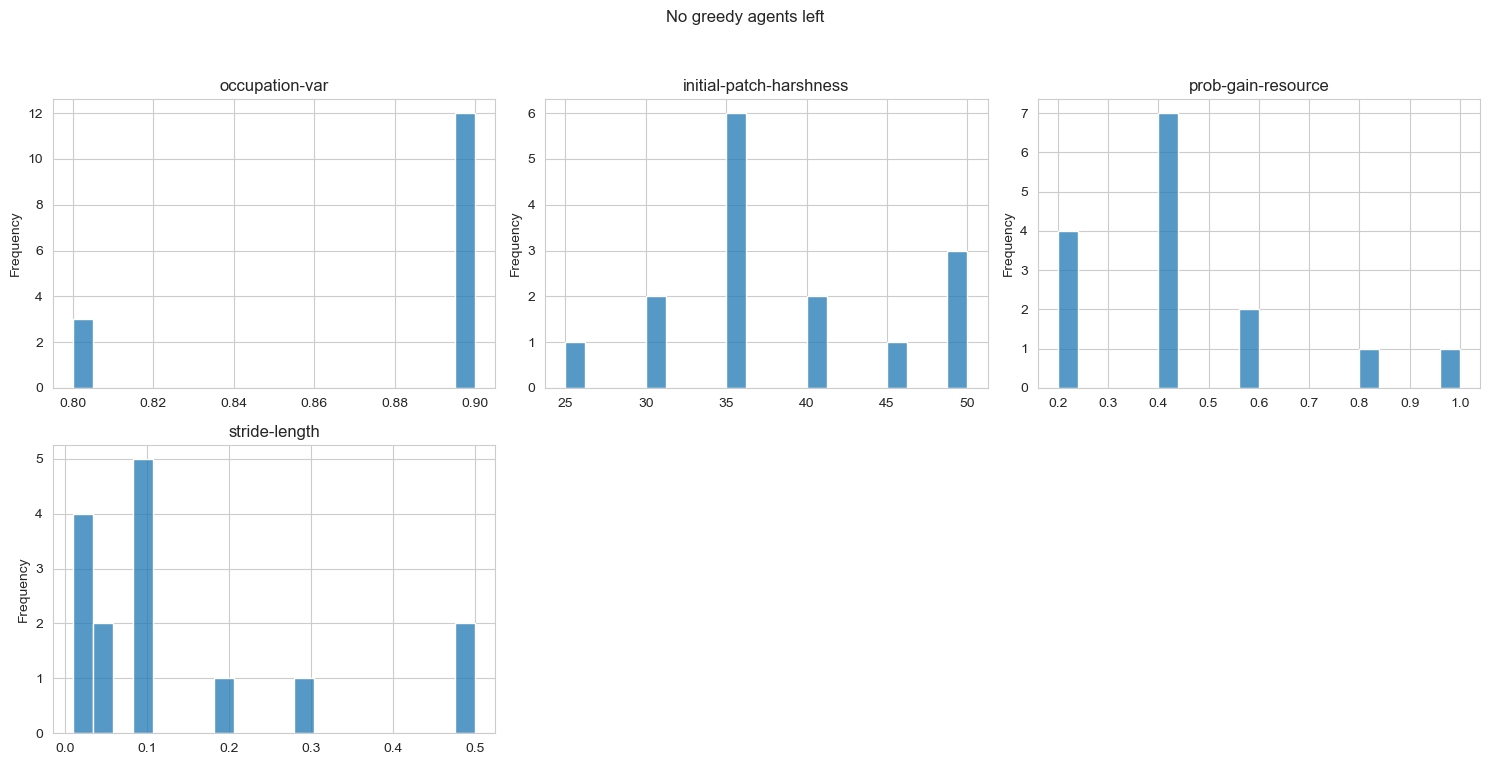

In [37]:
exp_no_greedy = exp[exp['count greedy-agents'] == 0]
exp_full_no_greedy = exp_full[exp_full['run-number'].isin(exp_no_greedy['run-number'])]
print('Number of runs with no greedy agents', len(exp_no_greedy))
plot_random_experiment(exp_full_no_greedy) 
strip_plots(exp_no_greedy, 'No greedy agents left')
plot_histograms_grid(exp_no_greedy, 'No greedy agents left')

#### Altruists survive

Number of runs with surviving altruists: 13444


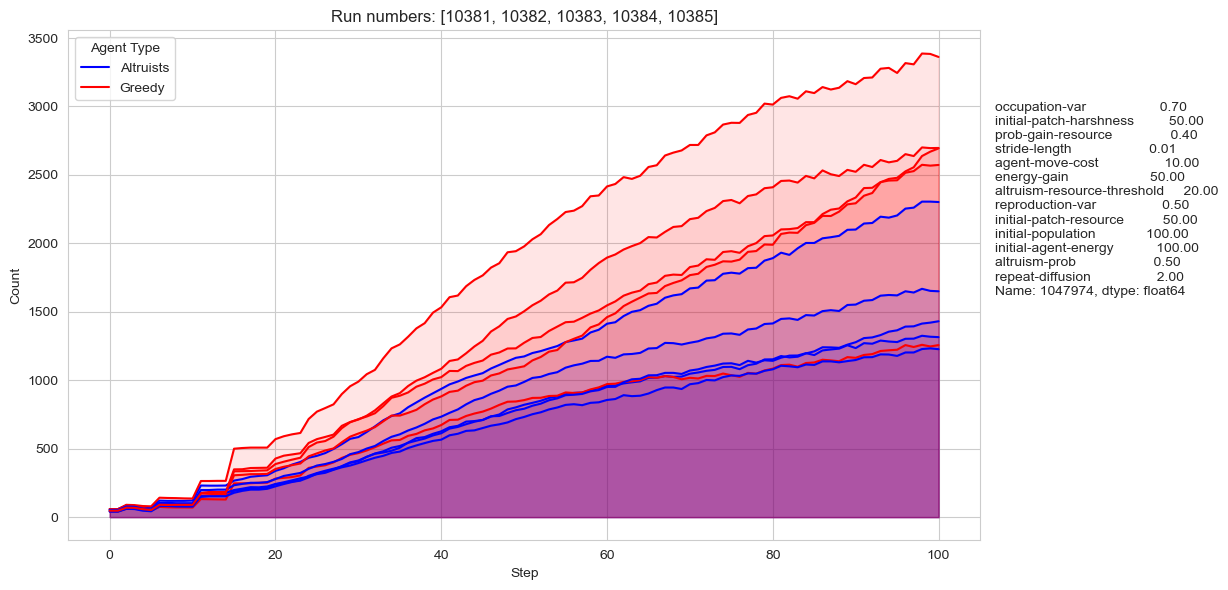

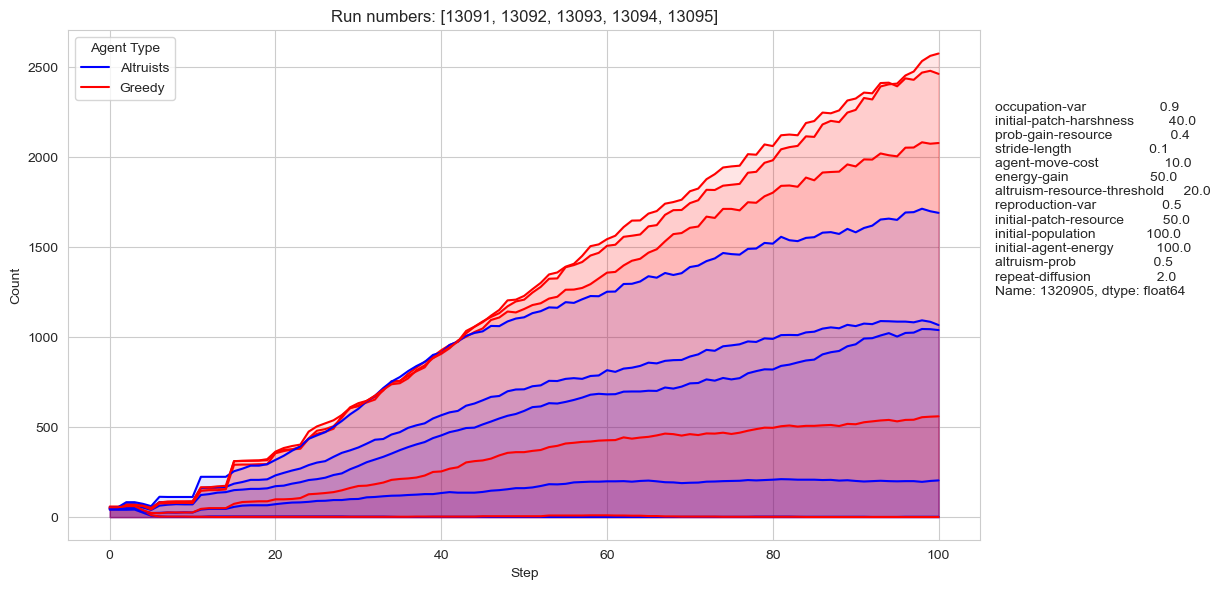

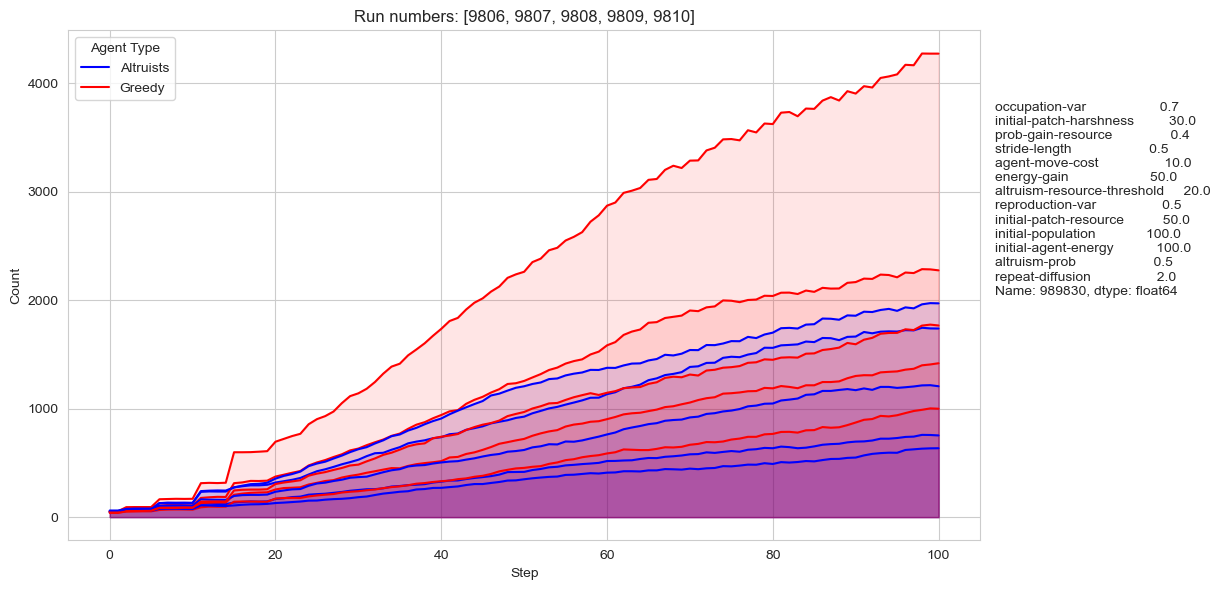

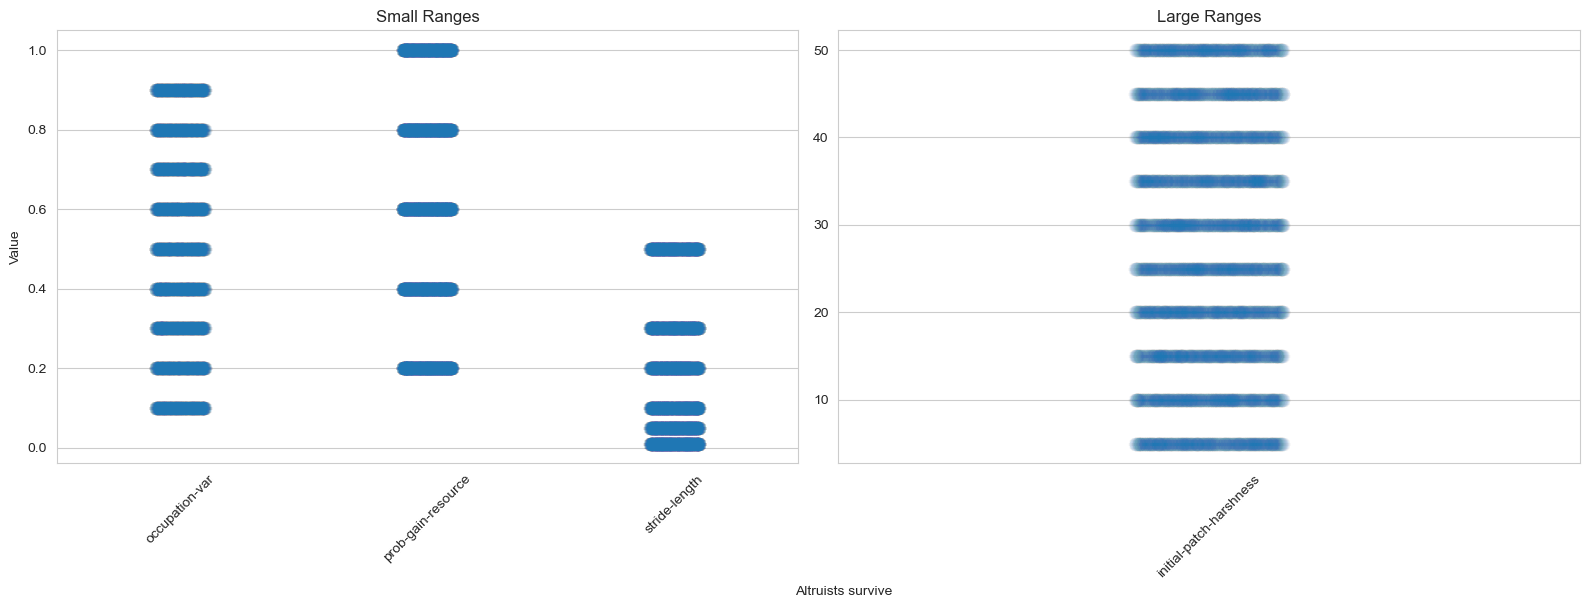

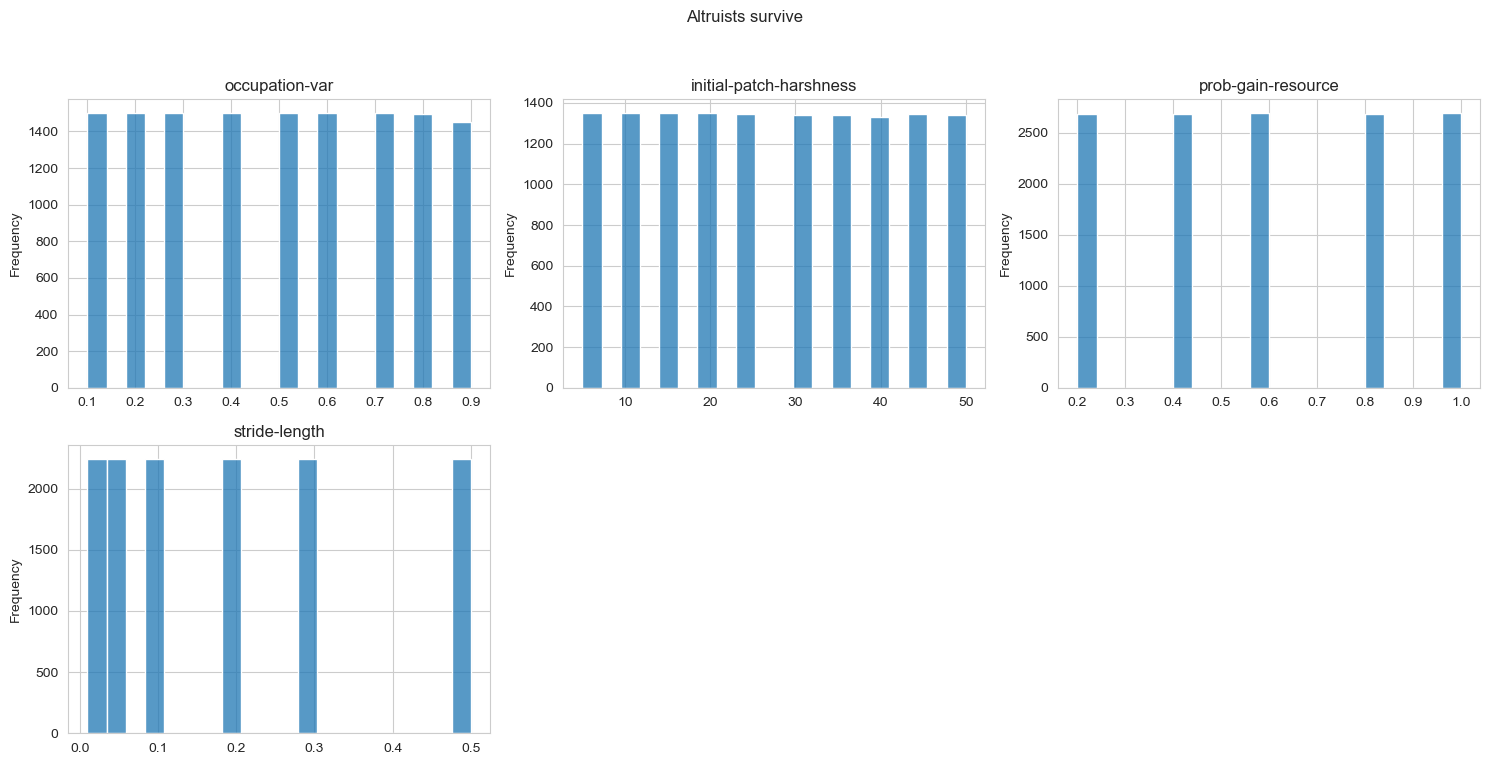

In [38]:
exp_altruists_survive = exp[exp['count altruism-agents'] > 0]
exp_full_alruists_survive = exp_full[exp_full['run-number'].isin(exp_altruists_survive['run-number'])]
print('Number of runs with surviving altruists:', len(exp_altruists_survive))
plot_random_experiment(exp_full_alruists_survive)
strip_plots(exp_altruists_survive, 'Altruists survive')
plot_histograms_grid(exp_altruists_survive, 'Altruists survive')

### More altruists than greedy agents

Number of runs with surviving altruists: 218


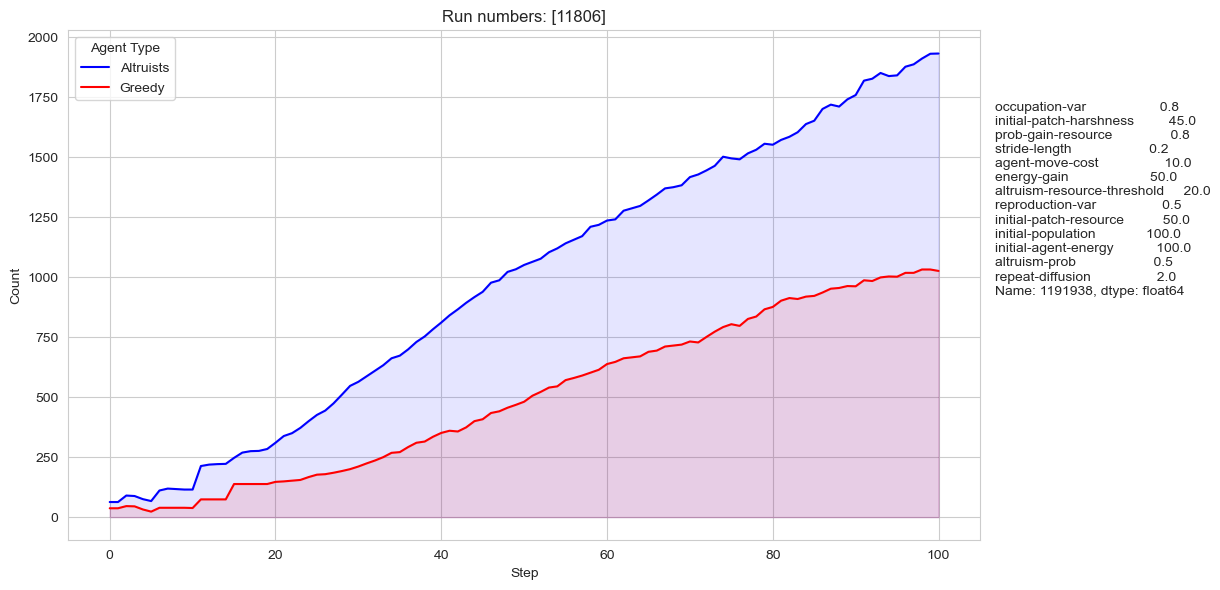

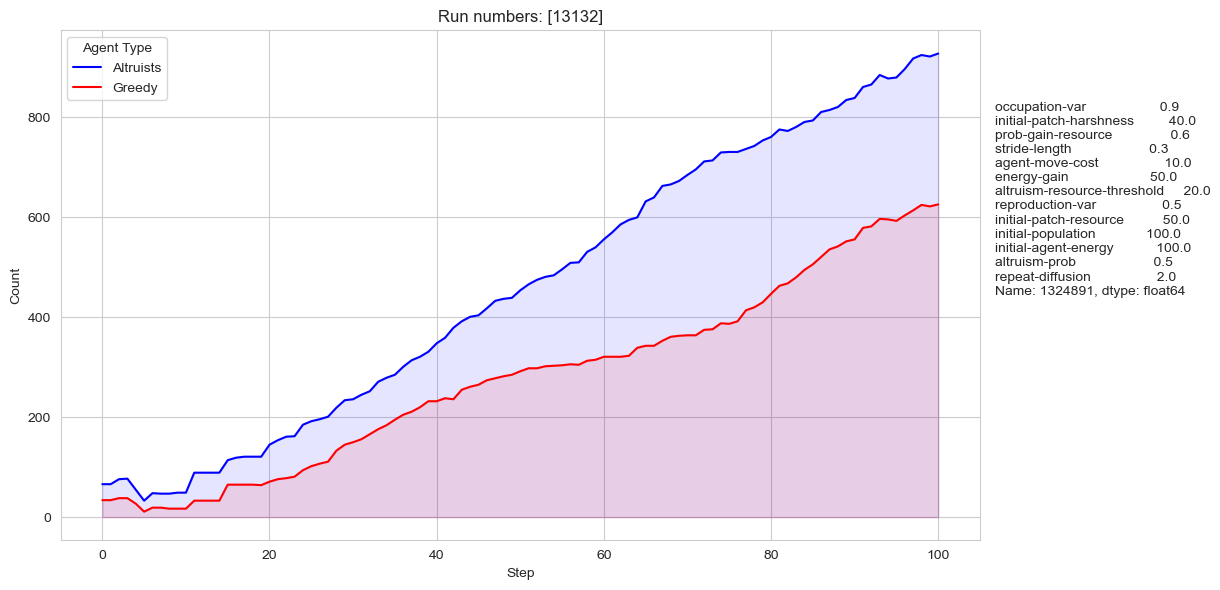

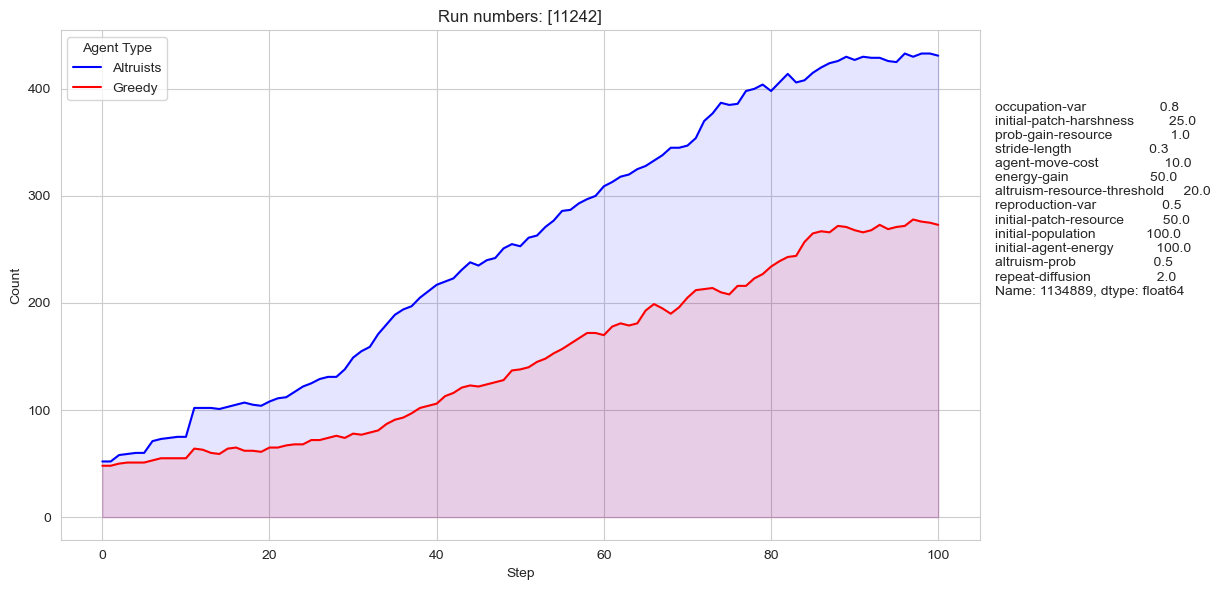

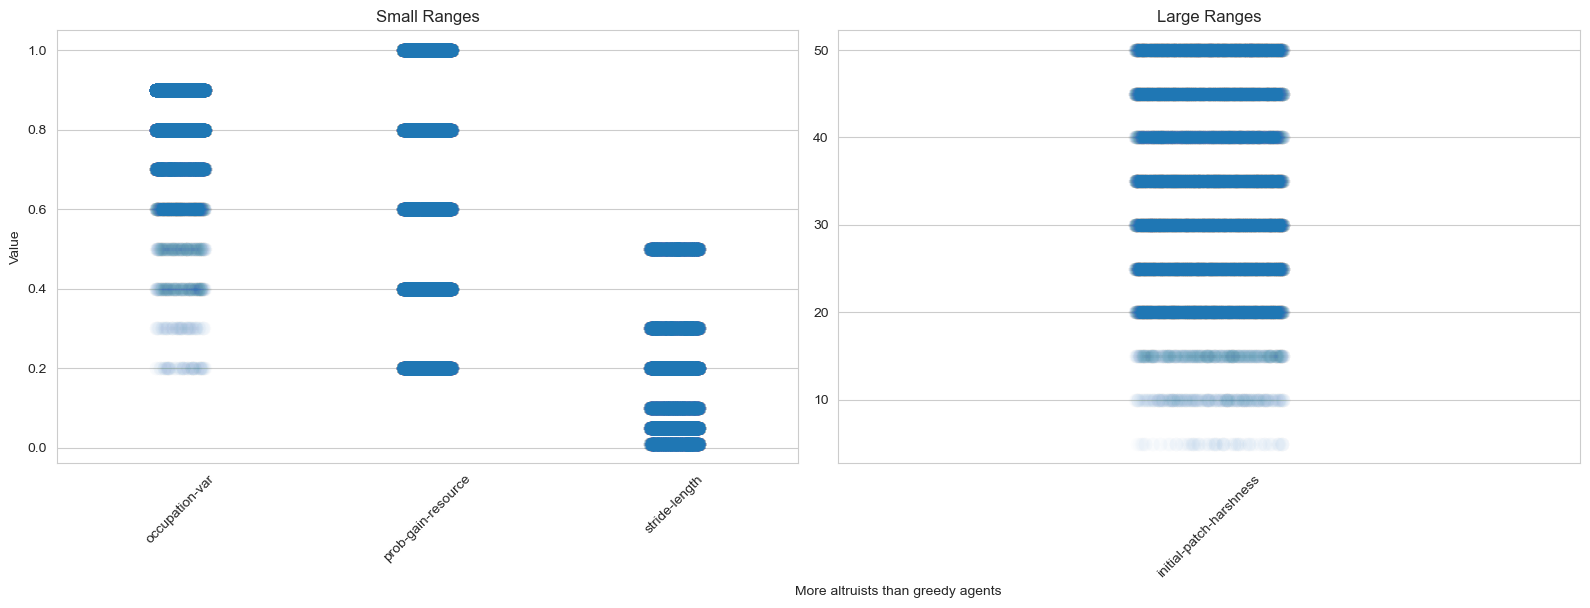

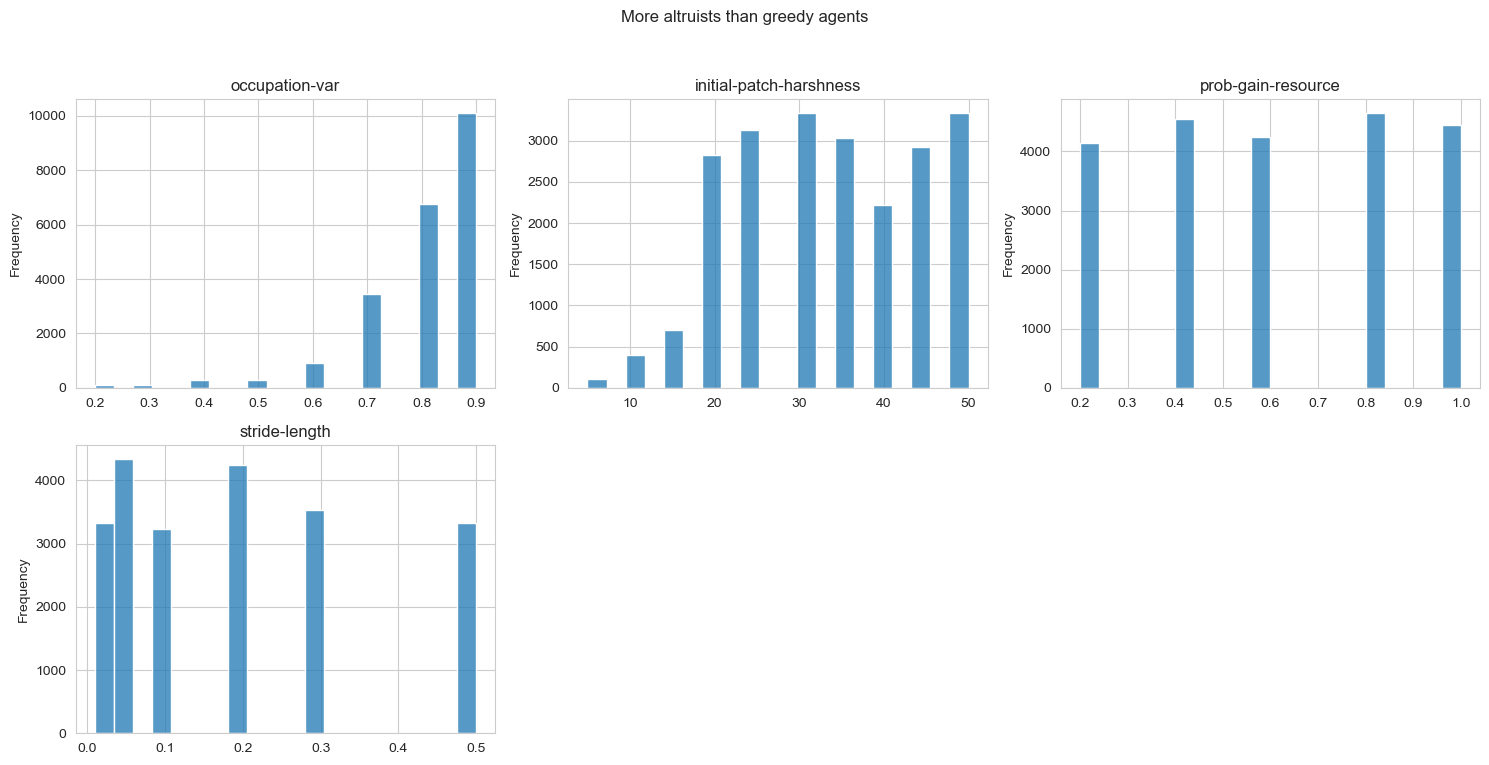

In [39]:
exp_more_altruists = exp[exp['count altruism-agents'] > 1.2 * exp['count greedy-agents']]
exp_full_more_altruists = exp_full[exp_full['run-number'].isin(exp_more_altruists['run-number'])]
print('Number of runs with surviving altruists:', len(exp_more_altruists))
plot_random_experiment(exp_full_more_altruists)
strip_plots(exp_full_more_altruists, 'More altruists than greedy agents')
plot_histograms_grid(exp_full_more_altruists, 'More altruists than greedy agents')

#### Here we create a gif varying the ratio between the greedy agents and the altruists and looking of the spread of the parameters, the gif allows us to see which parameters are important

In [40]:
images_path = Path('images_run_2')


def plot_histograms_grid_and_save(data, title, file_name):
    n_vars = len(varying_inputs)
    n_cols = 3
    n_rows = np.ceil(n_vars / n_cols).astype(int)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4))
    fig.suptitle(title)
    axes = axes.flatten()
    for i, var in enumerate(varying_inputs):
        sns.histplot(data[var], ax=axes[i], kde=False, bins=20)
        axes[i].set_title(var)
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(images_path / file_name)
    plt.close()
    
coefficients = np.arange(0.1, 1.6, 0.1) # Adjust the step if needed

frames = [] # To hold file names of the frames

for coeff in coefficients:
    filtered_df = exp[exp['count altruism-agents'] > coeff * exp['count greedy-agents']]
    file_name = f"hist_{coeff:.1f}.png"
    plot_histograms_grid_and_save(filtered_df, f"Ratio of altruists over greedy agents larger than coeff: {coeff:.1f})", file_name)
    frames.append(images_path / file_name)
    
def create_gif(frame_filenames, output_filename, duration=500):
    # Load frames
    frames = [Image.open(filename) for filename in frame_filenames]
    
    # Save as GIF
    frames[0].save(output_filename, format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=duration, loop=0)

output_filename = images_path / 'animation_run_2.gif'
create_gif(frames, output_filename, duration=500)